In [11]:
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import timedelta
import numpy as np

df = pd.read_csv("29286875.csv")

In [12]:
# change the column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head(n=3)

,id,drone_type,post_type,package_weight,origin_region,destination_region,origin_latitude,origin_longitude,destination_latitude,destination_longitude,journey_distance,departure_date,departure_time,travel_time,delivery_time,delivery_fare
0,ID5174772222,2.0,1.0,43.632,47.0,3.0,-37.355446,145.140356,-36.683571,147.271147,203.610,2018-03-24,03:47:54,163.99,6:31:53,187.16
1,ID1302741470,2.0,0.0,14.230,42.0,45.0,-38.029425,146.072856,-38.880642,145.089798,127.756,2018-04-01,19:00:04,105.65,20:45:43,132.04
2,ID1271333154,1.0,0.0,31.700,19.0,8.0,-38.467031,144.056414,-37.882256,147.344381,294.983,2018-04-27,01:05:05,240.38,5:05:27,122.90


In [13]:
df.at[0, 'drone_type'] = 8

In [19]:
df.loc[0, 'departure_time']

'03:47:54'

In [22]:
FMT = '%H:%M:%S'
second = (datetime.strptime(df.loc[0, 'departure_time'], FMT) + dt.timedelta(seconds=163)).time()
df.at[0, 'delivery_fare'] = second

# FMT = '%H:%M:%S'
# second = (datetime.strptime('03:47:54', FMT) + dt.timedelta(seconds=9839.9)).time()
# print(str(second))

In [23]:
df

,id,drone_type,post_type,package_weight,origin_region,destination_region,origin_latitude,origin_longitude,destination_latitude,destination_longitude,journey_distance,departure_date,departure_time,travel_time,delivery_time,delivery_fare
0,ID5174772222,8.0,1.0,43.632,47.0,3.0,-37.355446,145.140356,-36.683571,147.271147,203.610,2018-03-24,03:47:54,163.99,6:31:53,03:50:37
1,ID1302741470,2.0,0.0,14.230,42.0,45.0,-38.029425,146.072856,-38.880642,145.089798,127.756,2018-04-01,19:00:04,105.65,20:45:43,132.04
2,ID1271333154,1.0,0.0,31.700,19.0,8.0,-38.467031,144.056414,-37.882256,147.344381,294.983,2018-04-27,01:05:05,240.38,5:05:27,122.9
3,ID5399258418,2.0,1.0,11.500,7.0,48.0,-37.594913,147.765656,-38.942574,146.852666,169.915,2018-04-11,16:12:11,138.08,18:30:15,170.52
4,ID5288620287,1.0,1.0,14.545,28.0,4.0,-37.234915,144.722604,-37.682460,145.132520,61.595,2018-06-07,01:14:37,56.13,2:10:44,139.68
5,ID5993957587,2.0,1.0,33.332,9.0,24.0,-36.814897,144.334465,-38.966256,143.372101,253.963,2018-04-21,01:42:57,202.73,5:05:40,190.62
6,ID1175666777,3.0,0.0,14.360,34.0,46.0,-38.694757,144.574710,-37.414616,145.765778,176.649,2018-02-18,08:23:32,141.38,10:44:54,155.92
7,ID1247377835,1.0,0.0,16.681,21.0,4.0,-38.511416,148.229283,-37.934283,144.996650,289.890,2018-05-08,12:55:01,236.36,16:51:22,108.36
8,ID1727276208,1.0,0.0,7.631,21.0,4.0,-38.669030,147.959281,-37.785768,144.938933,281.808,2018-06-20,05:23:21,229.98,9:13:19,119.5
9,ID1656980587,1.0,0.0,41.862,33.0,24.0,-36.575290,143.945037,-38.903490,143.211961,267.079,2018-05-17,09:23:21,218.35,13:01:41,83.82


In [4]:
# swap columns
idx = (df['journey_distance']/df['travel_time'] > 2)
df.loc[idx,['drone_type','package_weight']] = df.loc[idx,['package_weight','drone_type']].values

In [5]:
df[df['origin_region'] ==2 ]

,id,drone_type,post_type,package_weight,origin_region,destination_region,origin_latitude,origin_longitude,destination_latitude,destination_longitude,journey_distance,departure_date,departure_time,travel_time,delivery_time,delivery_fare
132,ID5814696887,27.158,1.0,1.0,2.0,24.0,-36.993017,143.374260,-38.994243,143.331906,222.802,2018-02-06,02:16:46,183.40,5:20:10,154.54
192,ID1443976664,26.594,0.0,2.0,2.0,6.0,-36.917248,143.615432,-37.645427,146.334611,254.105,2018-01-18,06:22:15,202.84,9:45:05,129.25
275,ID1782380094,43.405,0.0,1.0,2.0,30.0,-36.994388,143.533340,-38.411974,143.086998,162.624,2018-01-19,07:42:57,135.89,9:58:50,82.54
359,ID1396067067,10.424,0.0,1.0,2.0,50.0,-37.123482,143.613555,-38.692115,142.916366,185.039,2018-02-26,10:21:36,153.58,12:55:10,84.99
415,ID5677870248,16.401,1.0,2.0,2.0,27.0,-36.894002,143.424075,-38.807822,146.436216,339.793,2018-02-24,23:44:06,268.75,4:12:51,196.91
519,ID5596112666,25.130,1.0,2.0,2.0,29.0,-37.053958,143.469210,-37.441535,148.349367,434.534,2018-01-22,15:11:39,341.63,20:53:16,194.03
549,ID1648173449,31.501,0.0,1.0,2.0,43.0,-36.860302,143.510405,-37.964699,144.651569,159.039,2018-02-13,03:31:44,133.06,5:44:47,107.47
618,ID1985296657,39.868,0.0,3.0,2.0,8.0,-36.976597,143.535926,-38.029101,147.416184,362.108,2018-06-07,10:23:59,282.23,15:06:12,176.24
640,ID1918105469,24.580,0.0,1.0,2.0,8.0,-37.077189,143.362501,-38.109865,147.186545,356.309,2018-01-23,10:09:44,288.80,14:58:32,100.19
720,ID1897175672,31.755,0.0,3.0,2.0,12.0,-37.114557,143.542010,-37.506710,142.984542,65.891,2018-02-11,03:14:03,57.26,4:11:18,169.32


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

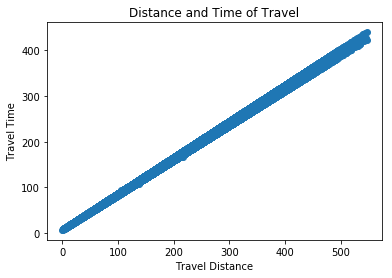

In [4]:
# find the linear regression relationship
plt.scatter(df['journey_distance'], df['travel_time'])
plt.title("Distance and Time of Travel")
plt.xlabel("Travel Distance")
plt.ylabel("Travel Time")
plt.show()

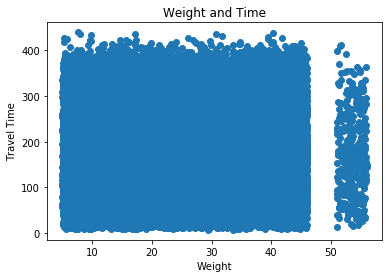

In [5]:
# find the linear regression relationship
plt.scatter(df['package_weight'], df['travel_time'])
plt.title("Weight and Time")
plt.xlabel("Weight")
plt.ylabel("Travel Time")
plt.show()

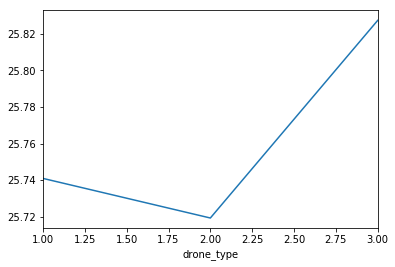

In [7]:
df.groupby('drone_type')['package_weight'].mean().plot(kind='line')
plt.show()

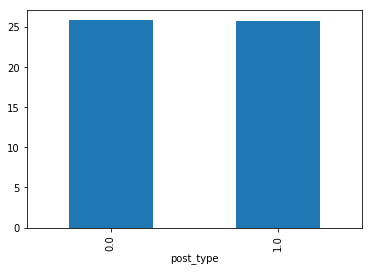

In [8]:
df.groupby('post_type')['package_weight'].mean().plot(kind='bar')
plt.show()

In [9]:
df.describe()

,drone_type,post_type,package_weight,origin_region,destination_region,origin_latitude,origin_longitude,destination_latitude,destination_longitude,journey_distance,travel_time,delivery_fare
count,39103.00000,39093.000000,39113.000000,39103.000000,39103.000000,39113.000000,39113.000000,39113.000000,39113.000000,39113.000000,39073.000000,39083.000000
mean,1.69230,0.301256,25.752878,26.096361,25.995806,-37.760422,145.441782,-37.753407,145.441519,214.074556,173.871859,143.265997
std,0.77928,0.458810,12.061919,14.707974,14.764419,1.879330,6.789891,1.878979,6.786131,110.863510,86.280082,54.611747
min,1.00000,0.000000,5.000000,1.000000,1.000000,-39.007000,-148.379237,-39.007000,-148.323485,0.069000,7.270000,61.590000
25%,1.00000,0.000000,15.412000,13.000000,13.000000,-38.506010,144.119892,-38.503470,144.108330,129.376000,107.920000,112.455000
50%,1.00000,0.000000,25.718000,26.000000,26.000000,-37.851078,145.622004,-37.828201,145.624633,203.547000,165.650000,137.280000
75%,2.00000,1.000000,36.000000,39.000000,39.000000,-37.091744,147.067670,-37.080648,147.081548,287.420000,230.780000,165.420000
max,3.00000,1.000000,55.986000,51.000000,51.000000,38.877106,148.449555,38.910056,148.449555,546.980000,439.170000,1171.080000


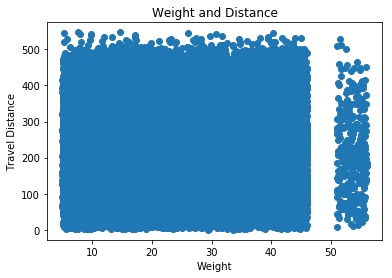

In [8]:
# find the linear regression relationship
plt.scatter(df['package_weight'], df['journey_distance'])
plt.title("Weight and Distance")
plt.xlabel("Weight")
plt.ylabel("Travel Distance")
plt.show()

In [11]:
df.describe()

,drone_type,post_type,package_weight,origin_region,destination_region,origin_latitude,origin_longitude,destination_latitude,destination_longitude,journey_distance,travel_time,delivery_fare
count,39103.00000,39093.000000,39113.000000,39103.000000,39103.000000,39113.000000,39113.000000,39113.000000,39113.000000,39113.000000,39073.000000,39083.000000
mean,1.69230,0.301256,25.752878,26.096361,25.995806,-37.760422,145.441782,-37.753407,145.441519,214.074556,173.871859,143.265997
std,0.77928,0.458810,12.061919,14.707974,14.764419,1.879330,6.789891,1.878979,6.786131,110.863510,86.280082,54.611747
min,1.00000,0.000000,5.000000,1.000000,1.000000,-39.007000,-148.379237,-39.007000,-148.323485,0.069000,7.270000,61.590000
25%,1.00000,0.000000,15.412000,13.000000,13.000000,-38.506010,144.119892,-38.503470,144.108330,129.376000,107.920000,112.455000
50%,1.00000,0.000000,25.718000,26.000000,26.000000,-37.851078,145.622004,-37.828201,145.624633,203.547000,165.650000,137.280000
75%,2.00000,1.000000,36.000000,39.000000,39.000000,-37.091744,147.067670,-37.080648,147.081548,287.420000,230.780000,165.420000
max,3.00000,1.000000,55.986000,51.000000,51.000000,38.877106,148.449555,38.910056,148.449555,546.980000,439.170000,1171.080000


In [12]:
fare_df = pd.DataFrame(df[['package_weight', 'journey_distance', 'travel_time', 'delivery_fare']], columns=['package_weight', 'journey_distance', 'travel_time', 'delivery_fare'])
fare_df.describe()

,package_weight,journey_distance,travel_time,delivery_fare
count,39113.000000,39113.000000,39073.000000,39083.000000
mean,25.752878,214.074556,173.871859,143.265997
std,12.061919,110.863510,86.280082,54.611747
min,5.000000,0.069000,7.270000,61.590000
25%,15.412000,129.376000,107.920000,112.455000
50%,25.718000,203.547000,165.650000,137.280000
75%,36.000000,287.420000,230.780000,165.420000
max,55.986000,546.980000,439.170000,1171.080000


In [13]:
# incorrect time format
delivery_time_df = pd.to_datetime(df['delivery_time'], format='%H:%M:%S', errors='coerce')

In [14]:
delivery_time_df

0       1900-01-01 06:31:53
1       1900-01-01 20:45:43
2       1900-01-01 05:05:27
3       1900-01-01 18:30:15
4       1900-01-01 02:10:44
5       1900-01-01 05:05:40
6       1900-01-01 10:44:54
7       1900-01-01 16:51:22
8       1900-01-01 09:13:19
9       1900-01-01 13:01:41
10      1900-01-01 07:05:20
11      1900-01-01 04:42:33
12      1900-01-01 02:24:45
13      1900-01-01 12:11:31
14      1900-01-01 00:10:33
15      1900-01-01 16:51:35
16      1900-01-01 21:53:19
17      1900-01-01 09:08:39
18      1900-01-01 04:22:17
19      1900-01-01 19:28:34
20      1900-01-01 15:51:48
21      1900-01-01 21:03:11
22      1900-01-01 01:11:28
23      1900-01-01 03:37:18
24      1900-01-01 19:45:30
25      1900-01-01 10:22:27
26      1900-01-01 03:44:00
27      1900-01-01 13:04:26
28      1900-01-01 22:31:52
29      1900-01-01 21:25:31
                ...        
39083   1900-01-01 12:18:35
39084   1900-01-01 21:31:53
39085   1900-01-01 17:40:10
39086   1900-01-01 05:42:01
39087   1900-01-01 0

In [15]:
delivery_time_df.isnull().sum()

0

In [4]:
# incorrect date format
departure_date_series = pd.to_datetime(df['departure_date'], format='%Y-%m-%d', errors='coerce')
# coerce/ignore

In [5]:
departure_date_series

0       2018-03-24
1       2018-04-01
2       2018-04-27
3       2018-04-11
4       2018-06-07
5       2018-04-21
6       2018-02-18
7       2018-05-08
8       2018-06-20
9       2018-05-17
10      2018-03-23
11      2018-02-24
12      2018-07-13
13      2018-07-27
14      2018-04-02
15      2018-04-01
16      2018-01-10
17      2018-05-03
18      2018-07-06
19      2018-04-27
20      2018-05-09
21      2018-05-12
22      2018-01-11
23      2018-04-10
24      2018-07-13
25      2018-03-13
26      2018-03-07
27      2018-07-05
28      2018-05-17
29      2018-02-19
           ...    
39083   2018-03-26
39084   2018-02-11
39085   2018-01-12
39086   2018-04-10
39087   2018-03-25
39088   2018-01-23
39089   2018-01-28
39090   2018-03-01
39091   2018-05-24
39092   2018-06-28
39093   2018-04-03
39094   2018-03-24
39095   2018-06-05
39096   2018-01-15
39097   2018-02-11
39098   2018-02-02
39099   2018-01-26
39100   2018-06-24
39101   2018-02-11
39102   2018-01-10
39103   2018-03-27
39104   2018

In [6]:
# find out how many incorrect date format
departure_date_series.isnull().sum()

211

In [7]:
# convert the series to a list
departure_date_list = departure_date_series.tolist()

In [8]:
df_copy = df.copy()

In [9]:
# add the list into data frame (df) and name it 'correct_drone_type'
df_copy['wrong_format_date'] = pd.Series(departure_date_list, index=df_copy.index)

In [10]:
# df_copy

In [11]:
# 找出哪些日期格式錯誤的index
df_copy[df_copy['wrong_format_date'].isnull()]
# len(df_copy[df_copy['wrong_format_date'].isnull()])

,id,drone_type,post_type,package_weight,origin_region,destination_region,origin_latitude,origin_longitude,destination_latitude,destination_longitude,journey_distance,departure_date,departure_time,travel_time,delivery_time,delivery_fare,wrong_format_date
856,ID1365624528,1.0,0.0,27.490,22.0,2.0,-38.531869,146.009068,-36.894002,143.472837,288.291,2018-22-03,15:26:37,235.10,19:21:42,109.85,NaT
923,ID5398053174,1.0,1.0,14.375,35.0,19.0,-36.635959,145.206846,-38.414723,144.240894,215.586,2018-25-03,00:56:08,177.70,3:53:49,149.63,NaT
931,ID5243340512,2.0,1.0,28.299,49.0,6.0,-38.278678,143.865677,-37.615235,146.014753,202.585,2018-26-06,09:18:20,163.21,12:01:32,156.46,NaT
947,ID1960163771,2.0,0.0,14.115,22.0,48.0,-38.636164,146.087507,-38.805976,146.928390,75.437,2018-23-06,01:56:46,65.40,3:02:10,134.82,NaT
984,ID5117760186,1.0,1.0,11.296,39.0,41.0,-36.612157,145.687317,-37.968680,142.949346,285.633,2018-14-02,13:01:50,233.00,16:54:50,140.41,NaT
1028,ID5990730696,1.0,1.0,25.680,47.0,40.0,-37.310057,144.873217,-38.335008,147.755152,277.894,2018-16-03,04:22:24,226.89,8:09:17,156.06,NaT
1286,ID1685766975,2.0,0.0,29.387,9.0,7.0,-36.800505,144.205854,-37.455132,147.620198,311.649,2018-06-31,04:51:54,247.10,8:58:59,164.11,NaT
1299,ID1141249853,3.0,0.0,10.505,50.0,25.0,-38.854012,142.872739,-37.756206,145.648902,271.539,2018-06-31,12:02:17,213.45,15:35:43,174.51,NaT
1357,ID1621404811,2.0,0.0,30.103,16.0,41.0,-36.856795,143.044071,-38.103830,142.864381,139.721,2018-06-31,20:08:46,114.85,22:03:36,135.08,NaT
1387,ID5922098827,1.0,1.0,32.052,8.0,33.0,-38.085226,147.230963,-36.649002,144.000967,327.413,2018-02-30,01:53:24,265.98,6:19:22,164.93,NaT


In [12]:
null_df = pd.DataFrame(df_copy[df_copy['wrong_format_date'].isnull()])
# null_df

In [13]:
date_df = pd.DataFrame(null_df[['departure_date']], columns=['departure_date'])
date_df

,departure_date
856,2018-22-03
923,2018-25-03
931,2018-26-06
947,2018-23-06
984,2018-14-02
1028,2018-16-03
1286,2018-06-31
1299,2018-06-31
1357,2018-06-31
1387,2018-02-30


In [14]:
# way1
date_df['departure_date'] = pd.to_datetime(date_df['departure_date'], format='%Y-%d-%m', errors='coerce')

date_df['year'] = pd.DatetimeIndex(date_df['departure_date']).year
date_df['month'] = pd.DatetimeIndex(date_df['departure_date']).month
date_df['day'] = pd.DatetimeIndex(date_df['departure_date']).day

date_df

In [14]:
# way2
date_df['departure_date'] = pd.to_datetime(date_df['departure_date'], format='%Y-%d-%m', errors='coerce')
date_df['year'], date_df['month'], date_df['day'] = date_df['departure_date'].dt.year, date_df['departure_date'].dt.month, date_df['departure_date'].dt.day
date_df

,departure_date,year,month,day
856,2018-03-22,2018.0,3.0,22.0
923,2018-03-25,2018.0,3.0,25.0
931,2018-06-26,2018.0,6.0,26.0
947,2018-06-23,2018.0,6.0,23.0
984,2018-02-14,2018.0,2.0,14.0
1028,2018-03-16,2018.0,3.0,16.0
1286,NaT,NaN,NaN,NaN
1299,NaT,NaN,NaN,NaN
1357,NaT,NaN,NaN,NaN
1387,NaT,NaN,NaN,NaN


In [17]:
# way3
date_df['departure_date'] = pd.to_datetime(date_df['departure_date'], format='%Y-%d-%m', errors='coerce')

date_df['year'] = date_df.departure_date.dt.year
date_df['month'] = date_df.departure_date.dt.month
date_df['day'] = date_df.departure_date.dt.day

date_df

In [1]:
# dt_obj = null_df['departure_date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%d-%m'))
# dt_obj

In [2]:
# null_df['departure_date'] = np.where(pd.to_datetime(null_df['departure_date']).strftime("%d") == 31, pd.to_datetime(null_df['departure_date']).strftime("%d") == 30, null_df['departure_date'])
# null_df

In [33]:
df_copy['departure_date'].dtype

dtype('O')

In [37]:
dt_obj = df_copy['departure_date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%d-%m'))
# dt_obj = dt.datetime.strptime(testeddate,'%m/%d/%Y')

In [43]:
df_copy['departure_date'] = np.where(df_copy['wrong_format_date'].isnull(), df_copy['departure_date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m')), df_copy['departure_date'])
# # df_copy['departure_date'] = np.where(df_copy['wrong_format_date'].isnull(), df_copy['departure_date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%d-%m')), df_copy['departure_date'])
# # df['date'] = df['date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m'))


# df_copy['departure_date'].dt.strftime('%Y-%d-%m')
# df_copy[df_copy['wrong_format_date'].isnull()]

TypeError: descriptor 'strftime' requires a 'datetime.date' object but received a 'str'

In [42]:
# find the end day of a month in the specific year
from pandas.tseries.offsets import MonthEnd
month_end_df = pd.DataFrame({'Date': [200104, 200508, 201002, 201602, 199912, 201802]})
month_end_df['EndOfMonth'] = pd.to_datetime(month_end_df['Date'], format="%Y%m") + MonthEnd(1)
month_end_df

,Date,EndOfMonth
0,200104,2001-04-30
1,200508,2005-08-31
2,201002,2010-02-28
3,201602,2016-02-29
4,199912,1999-12-31
5,201802,2018-02-28


In [20]:
import numpy as np
# replace NaN with the correct type number
df_copy['departure_date'] = np.where(df_copy['departure_date'].isnull(), df_copy['wrong_format_date'], df_copy['departure_date'])

In [21]:
df_copy[df_copy['departure_date'].isnull()]

,id,drone_type,post_type,package_weight,origin_region,destination_region,origin_latitude,origin_longitude,destination_latitude,destination_longitude,journey_distance,departure_date,departure_time,travel_time,delivery_time,delivery_fare,wrong_format_date
